#### Import the libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Load the Data

In [2]:
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')

#### Let's see what is in the data?


In [3]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Are  there any missing values in our Dataset?

In [4]:
titanic_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Gilinski, Mr. Eliezer",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


######  It seems Age , Cabin and Embarked variables have some missing values. Let's check how many missing values are present in these variables.

In [5]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

###### In our Dataset Cabin variable has huge missing values which makes this variable inappropriate to include in our Dataset.      Instead of it Age and Embarked variables have less missing values that can be handled and included in our Dataset.      Let's handle missing value in these two variables.

In [6]:
titanic_train[titanic_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


###### Our Embarked variable has missing value in which class is first class and fare is 80$.

###### We have to find out that which embarked is related to the first class passenger whose fare is 80$.

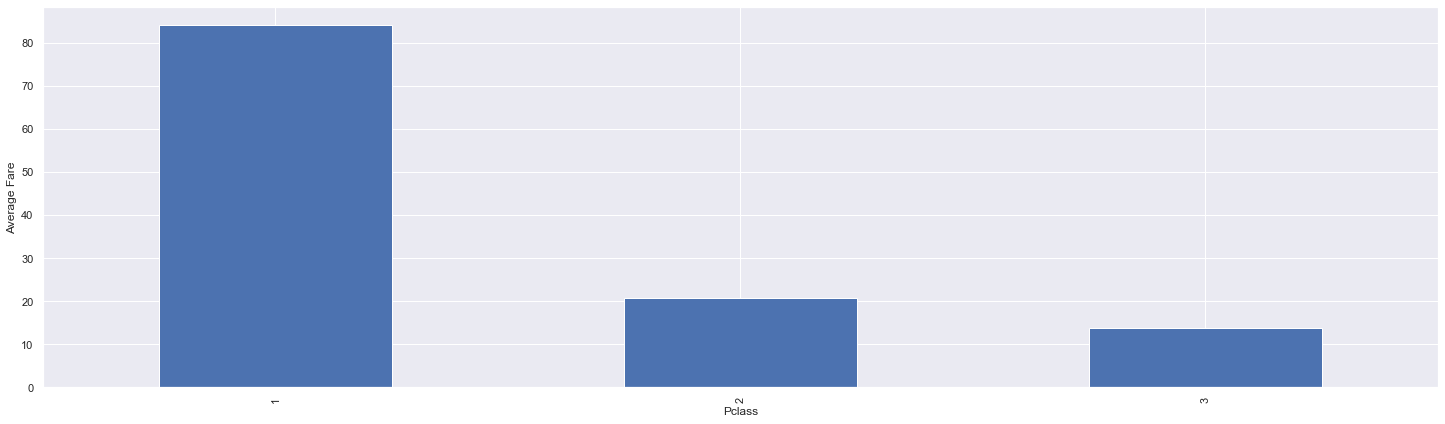

In [7]:
ax = plt.subplot()
ax.set_ylabel('Average Fare')
titanic_train.groupby('Pclass').mean()['Fare'].plot(kind='bar',figsize=(25,7), ax=ax)

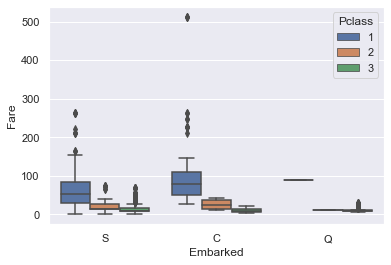

In [8]:
sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=titanic_train)

######  We can notice in above mentioned plot that 'C' Embarked is appropriate for 1st class and median fare 80$.

###### That's why we can place the C embarked in our missing data. Let's do it.

In [9]:
titanic_train['Embarked'] = titanic_train.Embarked.fillna('C')

In [10]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

######  Now we can see that Embarked variable doesn't have any missing data.

###### Now we do some Data visualization of our dataset to get some insights from our data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002211BCC8610>,
      dtype=object)

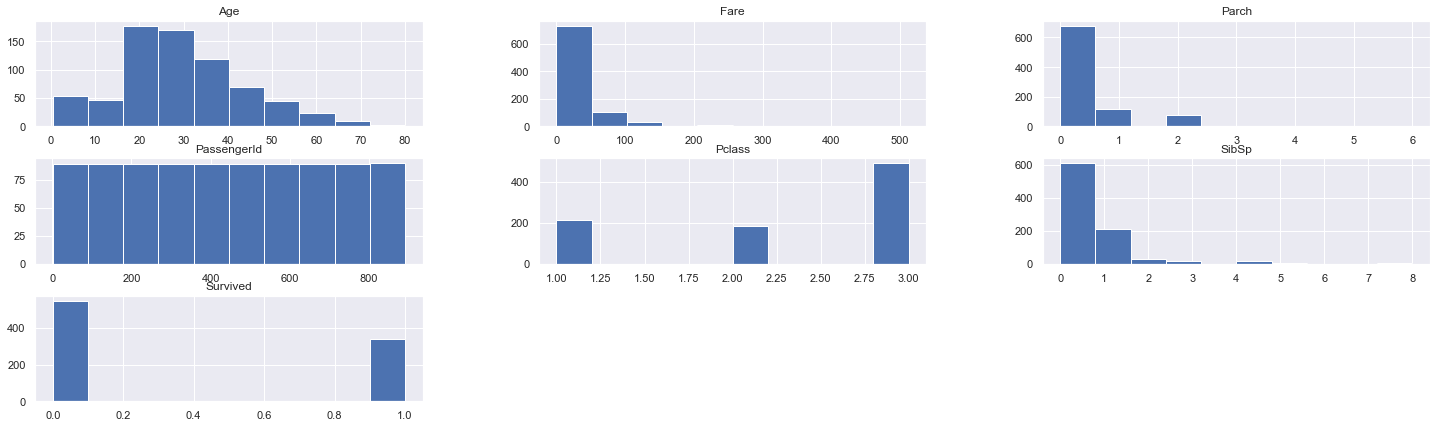

In [11]:
titanic_train.hist(bins=10, figsize=(25,7))

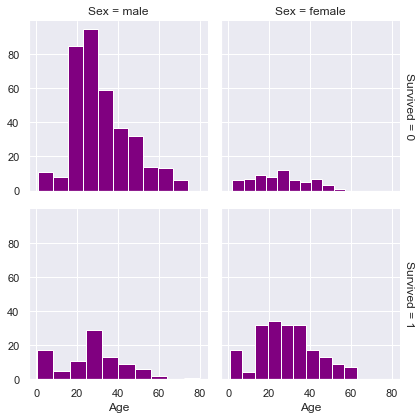

In [12]:
g = sns.FacetGrid(data=titanic_train,row='Survived',col='Sex',margin_titles=True)
g.map(plt.hist,'Age', color='purple')


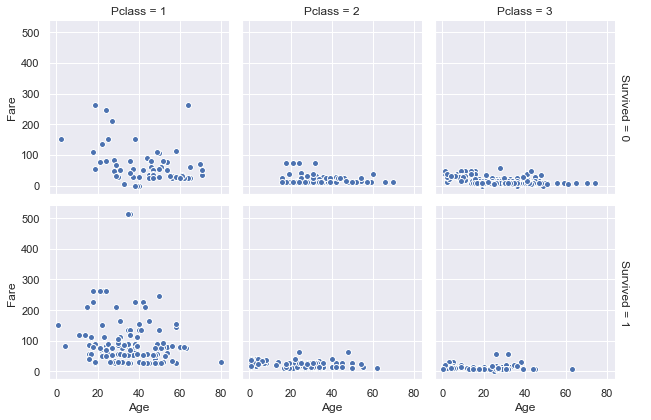

In [13]:
g = sns.FacetGrid(titanic_train,row='Survived', col='Pclass',margin_titles=True)
g.map(plt.scatter,'Age','Fare',edgecolor='w').add_legend()

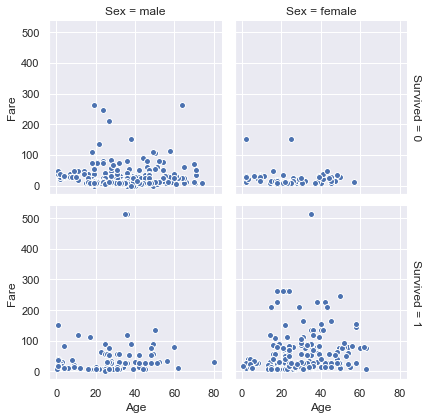

In [14]:
g = sns.FacetGrid(titanic_train,row='Survived', col='Sex',margin_titles=True)
g.map(plt.scatter,'Age','Fare',edgecolor='w').add_legend()

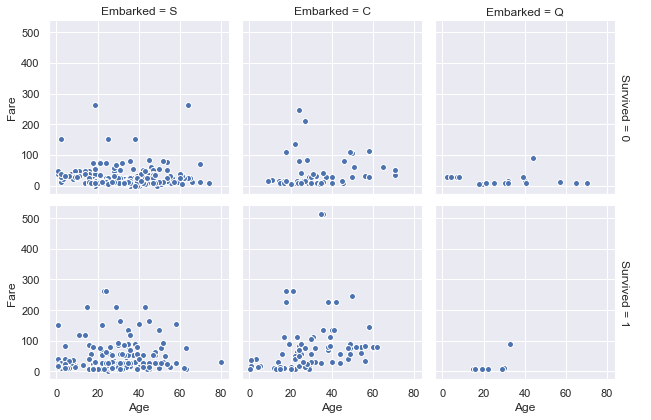

In [15]:
g = sns.FacetGrid(titanic_train,row='Survived', col='Embarked',margin_titles=True)
g.map(plt.scatter,'Age','Fare',edgecolor='w').add_legend()

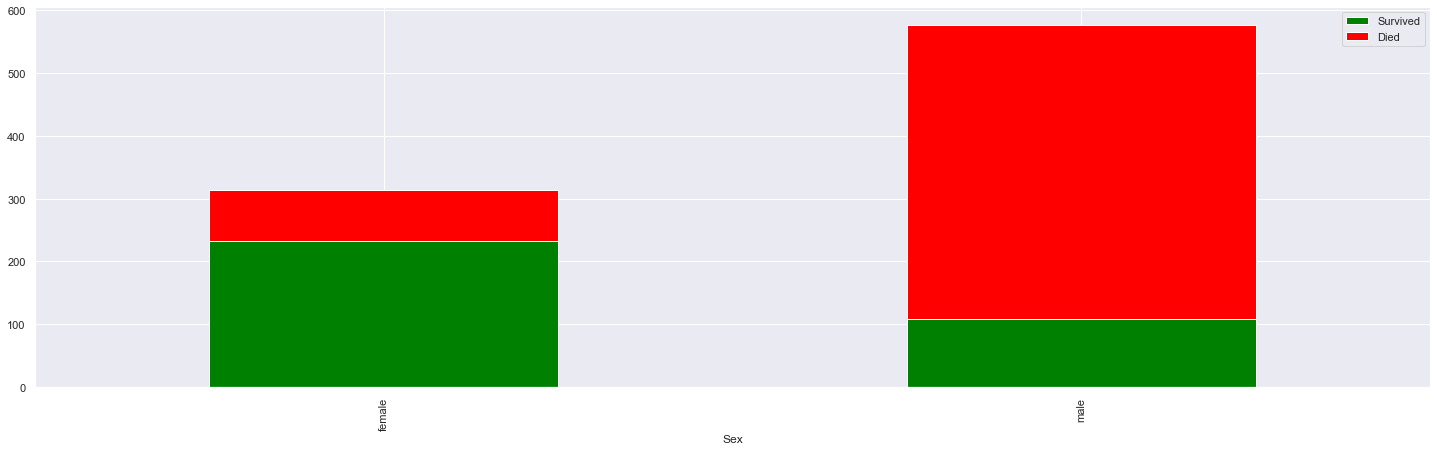

In [16]:
titanic_train['Died'] = 1- titanic_train['Survived']
titanic_train.groupby('Sex').agg('sum')[['Survived','Died']].plot(kind='bar',figsize=(25,7),stacked=True,
                                                                 color=('green','red'))

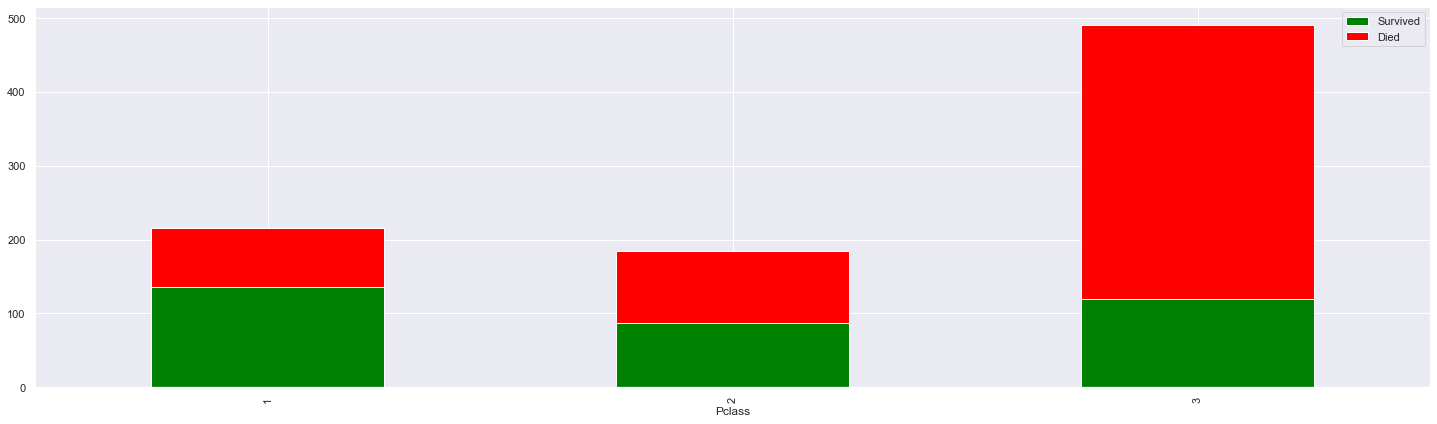

In [17]:
titanic_train.groupby('Pclass').agg('sum')[['Survived','Died']].plot(kind='bar',figsize=(25,7),stacked=True,
                                                                    color=('green','red'))

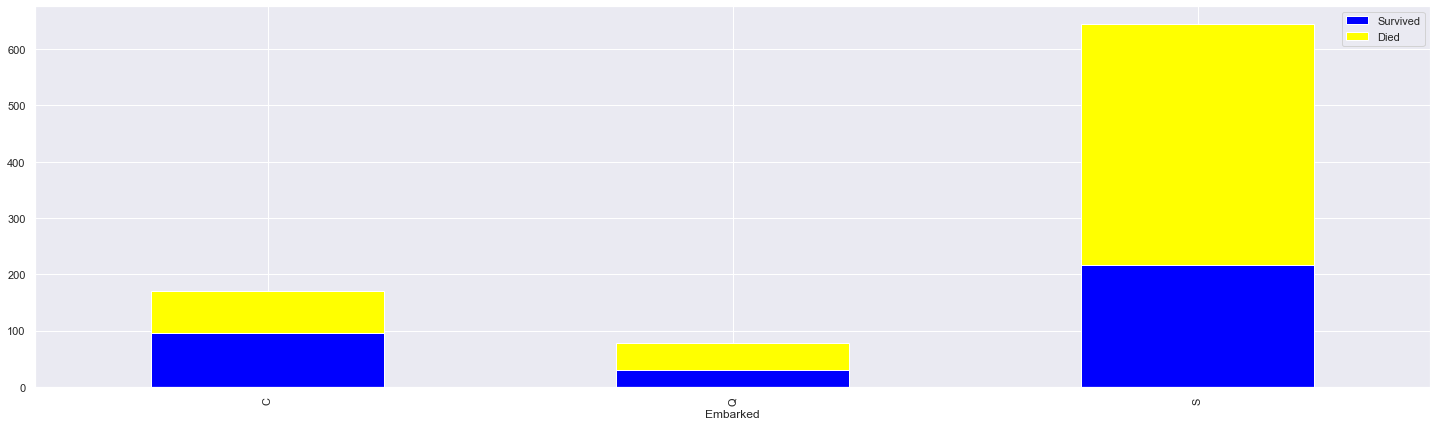

In [18]:
titanic_train.groupby('Embarked').agg('sum')[['Survived','Died']].plot(kind='bar',figsize=(25,7),
                                                                      stacked=True, color=('blue','yellow'))

Text(0.5, 1.0, 'Survival by Age')

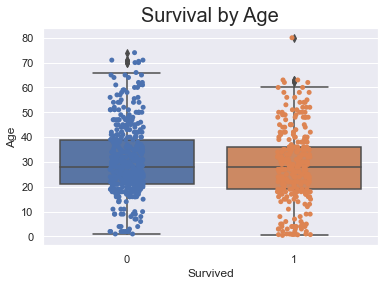

In [19]:
ax = sns.boxplot(x='Survived', y='Age', data=titanic_train)
ax = sns.stripplot(x='Survived',y='Age',data=titanic_train, jitter=True, edgecolor='gray')
plt.title('Survival by Age', fontsize=20)

Text(0.5, 1.0, 'Survival by Fare')

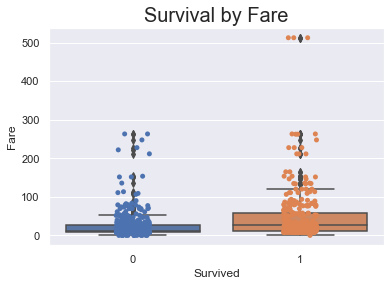

In [20]:
ax = sns.boxplot(x='Survived', y='Fare', data=titanic_train)
ax = sns.stripplot(x='Survived',y='Fare',data=titanic_train, jitter=True, edgecolor='gray')
plt.title('Survival by Fare', fontsize=20)

###### Now we'll check the relationship between the variables.

Text(0.5, 1.0, 'Correlation between Features')

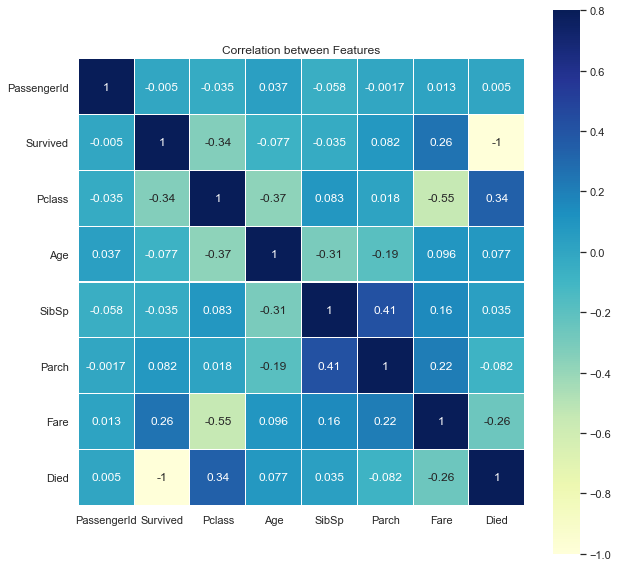

In [21]:
corr = titanic_train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, vmax=0.8,linewidths=0.01, annot=True,square=True, cmap='YlGnBu', linecolor='white')
plt.title('Correlation between Features')

###### Now we'll look the test dataset.

In [22]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [23]:
titanic_test.describe(include='all')


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Baimbrigge, Mr. Charles Robert",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


###### There are some missing values present in Age,Cabin and Fare features.Let's handle these variables.

In [24]:
titanic_test['Age'].isnull().sum()

86

In [25]:
titanic_test['Age'] = titanic_test['Age'].fillna(titanic_test.Age.median())

In [26]:
titanic_test['Age'].isnull().sum()

0

In [27]:
titanic_test[titanic_test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [28]:
titanic_test['Fare']= titanic_test['Fare'].fillna(titanic_test[(titanic_test['Pclass']==3) & 
                                                    (titanic_test['Embarked'] =='S')]['Fare'].median())
    

In [29]:
titanic_test['Fare'].isnull().sum()

0

#### Feature Engineering

###### Now we are creating some variables by using other features to get some useful information about our dataset.

###### Deck , where exactly were  passengers on the ship?

In [30]:
titanic_train['Deck'] = titanic_train['Cabin'].str[0]
titanic_test['Deck'] = titanic_test['Cabin'].str[0]

In [31]:
titanic_train['Deck'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [32]:
titanic_test['Deck'].unique()

array([nan, 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

C:\Users\Yusuf\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Yusuf\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


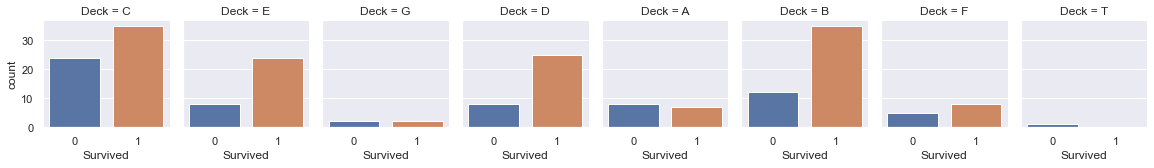

In [33]:
sns.factorplot('Survived',col ='Deck', kind='count', data = titanic_train[titanic_train.Deck.notnull()],
                size=2.5, aspect=0.8)

In [34]:
titanic_train['Deck'] = titanic_train['Deck'].fillna('Z')
titanic_test['Deck'] = titanic_test['Deck'].fillna('Z')

In [35]:
titanic_train['Deck'].unique()

array(['Z', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [36]:
titanic_train = titanic_train.assign(Deck = titanic_train.Deck.astype(object))

C:\Users\Yusuf\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


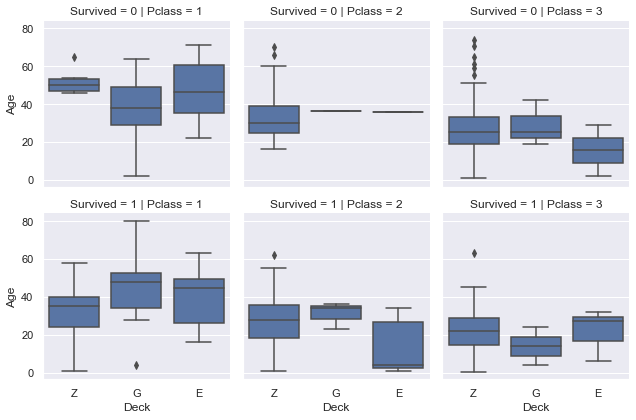

In [37]:
g = sns.FacetGrid(titanic_train, col='Pclass',row='Survived')
g.map(sns.boxplot, 'Deck', 'Age')

###### How big was there family?

In [38]:
titanic_train['FamilySize'] = titanic_train['SibSp']+titanic_train['Parch']+1
titanic_test['FamilySize'] = titanic_test['SibSp']+titanic_test['Parch']+1

In [39]:
titanic_train['FamilySize'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11], dtype=int64)

In [40]:
titanic_test['FamilySize'].unique()

array([ 1,  2,  3,  5,  4,  6,  8,  7, 11], dtype=int64)

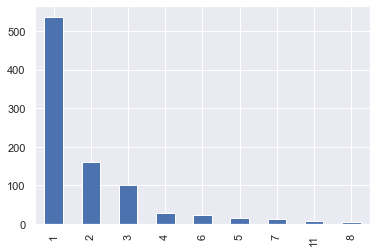

In [41]:
titanic_train['FamilySize'].value_counts().plot(kind='bar')

In [42]:
titanic_train.loc[titanic_train['FamilySize']==1, 'Fsize'] = ' single'
titanic_train.loc[(titanic_train['FamilySize']>1) & (titanic_train['FamilySize']<5), 'Fsize'] = 'small'
titanic_train.loc[titanic_train['FamilySize']>4,'Fsize'] = 'large'

In [43]:
titanic_test.loc[titanic_test['FamilySize']==1, 'Fsize'] = ' single'
titanic_test.loc[(titanic_test['FamilySize']>1) & (titanic_test['FamilySize']<5), 'Fsize'] = 'small'
titanic_test.loc[titanic_test['FamilySize']>4,'Fsize'] = 'large'

In [44]:
titanic_train['Fsize'].unique()

array(['small', ' single', 'large'], dtype=object)

In [45]:
titanic_train['Fsize'].value_counts()

 single    537
small      292
large       62
Name: Fsize, dtype: int64

C:\Users\Yusuf\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


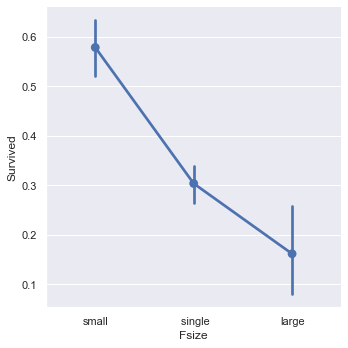

In [46]:
sns.factorplot(x='Fsize', y='Survived', data=titanic_train)

In [47]:
titanic_train['NameLength'] = titanic_train['Name'].apply(lambda x: len(x))
titanic_test['NameLength'] = titanic_test['Name'].apply(lambda x : len(x))

In [48]:
titanic_train['NameLength'].unique()

array([23, 51, 22, 44, 24, 16, 30, 49, 35, 31, 27, 36, 32, 20, 28, 55, 21,
       29, 57, 19, 46, 34, 56, 40, 17, 25, 45, 26, 50, 13, 15, 33, 18, 52,
       47, 38, 37, 41, 14, 42, 39, 82, 48, 54, 43, 67, 65, 53, 61, 12],
      dtype=int64)

In [49]:
titanic_train['NameLength'].value_counts()

19    64
25    55
27    50
18    50
26    49
28    43
24    43
17    42
21    40
23    39
20    39
22    38
30    37
29    32
31    30
16    26
32    23
33    22
15    15
47    11
37    10
38     9
36     9
39     9
45     9
44     8
41     8
34     7
46     7
40     7
51     7
35     6
43     5
42     5
49     5
50     4
52     4
56     3
14     3
48     3
13     2
12     2
53     2
55     2
57     2
67     1
54     1
61     1
65     1
82     1
Name: NameLength, dtype: int64

In [50]:
bins = [0, 20, 40,57,85]
group_names = ['short', 'ok', 'good', 'long']
titanic_train['NL'] = pd.cut(titanic_train['NameLength'], bins,labels = group_names)
titanic_test['NL'] = pd.cut(titanic_test['NameLength'], bins,labels = group_names)

In [51]:
titanic_train['NL'].unique()

[ok, good, short, long]
Categories (4, object): [short < ok < good < long]

In [52]:
titanic_train['NL'].value_counts()

ok       558
short    243
good      86
long       4
Name: NL, dtype: int64

C:\Users\Yusuf\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


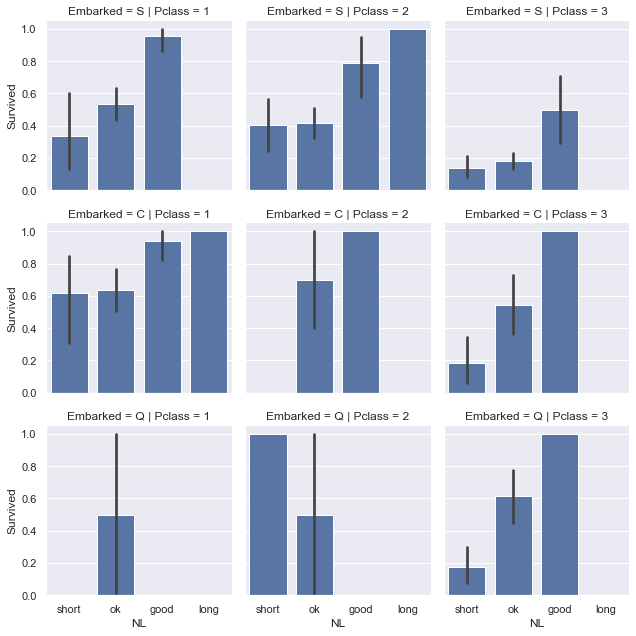

In [53]:
g = sns.FacetGrid(data=titanic_train, row='Embarked', col='Pclass')
g.map(sns.barplot,'NL','Survived')

In [54]:
data= [titanic_train,titanic_test]

In [55]:
titles = {'Mr.':1,'Mrs.':2,'Miss':3, 'Master':4, 'Rare':5}

In [56]:
for dataset in data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Ms',"Miss")
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs.')
    
    

In [57]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died,Deck,FamilySize,Fsize,NameLength,NL,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Z,2,small,23,ok,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,C,2,small,51,good,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Z,1,single,22,ok,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,C,2,small,44,good,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Z,1,single,24,ok,Mr


In [58]:
titanic_train['FamilySize'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11], dtype=int64)

In [59]:
titanic_train['Ticket'].tail()

886        211536
887        112053
888    W./C. 6607
889        111369
890        370376
Name: Ticket, dtype: object

In [60]:
titanic_train['TicketNumber'] = titanic_train['Ticket'].str.extract('(\d{2,})', expand = True)
titanic_train['TicketNumber'] = titanic_train['TicketNumber'].apply(pd.to_numeric)

In [61]:
titanic_test['TicketNumber'] = titanic_test['Ticket'].str.extract('(\d{2,})', expand = True)
titanic_test['TicketNumber'] = titanic_test['TicketNumber'].apply(pd.to_numeric)

In [62]:
titanic_train[titanic_train['TicketNumber'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died,Deck,FamilySize,Fsize,NameLength,NL,Title,TicketNumber
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,1,Z,1,single,19,short,Mr,NaN
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,0,Z,1,single,28,ok,Mr,NaN
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,1,Z,1,single,31,ok,Mr,NaN
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,1,Z,1,single,19,short,Mr,NaN
772,773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5,E77,S,1,E,1,single,17,short,Mrs,NaN
841,842,0,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.5,NaN,S,1,Z,1,single,24,ok,Mr,NaN


In [63]:
titanic_train['TicketNumber'] = titanic_train['TicketNumber'].fillna(titanic_train['TicketNumber'].median())
titanic_test['TicketNumber'] = titanic_test['TicketNumber'].fillna(titanic_test['TicketNumber'].median())

In [64]:
titanic_train['TicketNumber'].isnull().sum()

0

In [65]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [66]:
labelEnc=LabelEncoder()

cat_vars=['Embarked','Sex',"Title","Fsize","NL",'Deck']
for col in cat_vars:
    titanic_train[col]=labelEnc.fit_transform(titanic_train[col])
    titanic_test[col]=labelEnc.fit_transform(titanic_test[col])

titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died,Deck,FamilySize,Fsize,NameLength,NL,Title,TicketNumber
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,1,8,2,2,23,2,2,21171.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,0,2,2,2,51,0,3,17599.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,0,8,1,0,22,2,1,3101282.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,0,2,2,2,44,0,3,113803.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,1,8,1,0,24,2,2,373450.0


In [67]:
data = [titanic_train, titanic_test]

for dataset in data:
    mean = titanic_train["Age"].mean()
    std = titanic_test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = titanic_train["Age"].astype(int)
titanic_train["Age"].isnull().sum()

0

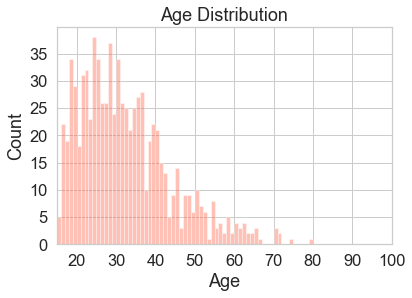

In [68]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(titanic_train["Age"].dropna(),
                 bins=80,
                 kde=False,
                 color="tomato")
    plt.title("Age Distribution")
    plt.ylabel("Count")
    plt.xlim((15,100))

In [69]:
from sklearn import preprocessing

In [70]:
std_scale = preprocessing.StandardScaler().fit(titanic_train[['Age','Fare']])
titanic_train[['Age','Fare']] = std_scale.transform(titanic_train[['Age','Fare']])

In [71]:
std_scale = preprocessing.StandardScaler().fit(titanic_test[['Age','Fare']])
titanic_test[['Age','Fare']] = std_scale.transform(titanic_test[['Age','Fare']])

In [72]:
titanic_train.corr()['Survived']

PassengerId    -0.005007
Survived        1.000000
Pclass         -0.338481
Sex            -0.543351
Age            -0.058263
SibSp          -0.035322
Parch           0.081629
Fare            0.257307
Embarked       -0.174199
Died           -1.000000
Deck           -0.301116
FamilySize      0.016639
Fsize           0.249714
NameLength      0.332350
NL             -0.312234
Title          -0.064970
TicketNumber   -0.096161
Name: Survived, dtype: float64

In [73]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

In [74]:
predictors = ["Pclass", "Sex", "Age","SibSp", "Parch", "Fare",
              "Embarked","NL", "Fsize", "Title","Deck"]

In [75]:
target = ['Survived']

In [76]:
lm = LinearRegression()

In [77]:
kf = RepeatedKFold(titanic_train.shape[0], shuffle=True, random_state=1)
predictions = []

In [78]:
kf.get_n_splits(titanic_train)

891

In [79]:
for train,test in kf.split(titanic_train):
    train_predictors =titanic_train[predictors].iloc[train,:]
    train_target = titanic_train[target].iloc[train]
    lm.fit(train_predictors, train_target)
    test_prediction = lm.predict(titanic_train[predictors].iloc[test,:])
    predictions.append(test_prediction)                          
                                 
                                 

In [80]:
predictions = np.concatenate(predictions,axis=0)

In [81]:
predictions.shape

(891, 1)

In [82]:
predictions[predictions > 0.5] = 1
predictions[predictions < 0.5] = 0


In [83]:
predictions = predictions.reshape(-1)

In [84]:
predictions.shape

(891,)

In [85]:
accuracy =sum(titanic_train['Survived']==predictions)/len(titanic_train['Survived'])
accuracy

0.5409652076318743

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit


In [87]:
predictors = ["Pclass", "Sex", "Fare", "Embarked","Deck","Age",
              "Fsize", "NL","Title","Parch"]

In [88]:
lr = LogisticRegression(random_state=1)

In [89]:
cv = ShuffleSplit(n_splits=10 , test_size=0.3 , random_state=50)

In [90]:
scores = cross_val_score(lr, titanic_train[predictors], titanic_train['Survived'], 
                           cv=cv)


In [91]:
print(scores.mean())

0.8014925373134328


In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

In [93]:
predictors = ["Pclass", "Sex", "Age",
              "Fare","NL","NameLength", "Fsize", "Title","Deck"]

In [94]:
rf = RandomForestClassifier(n_estimators=10, min_samples_leaf=1, min_samples_split=2, random_state=1)

In [95]:
kf = KFold(titanic_train.shape[0],random_state=1, shuffle=True)

In [96]:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=50)

In [97]:
predictions = cross_val_predict(rf, titanic_train[predictors], titanic_train['Survived'], cv=kf)

In [98]:
predictions = pd.Series(predictions)

In [99]:
scores = cross_val_score(rf, titanic_train[predictors],titanic_train['Survived'], cv=kf)

In [100]:
print(scores.mean())

0.813692480359147


In [101]:
predictors = ["Pclass", "Sex", "Age",
              "Fare","NL","NameLength", "Fsize", "Title","Deck","TicketNumber"]

In [102]:
rf = RandomForestClassifier(n_estimators=50, max_depth=9,
                            min_samples_split=6,min_samples_leaf=4,random_state=1)

In [103]:
rf.fit(titanic_train[predictors], titanic_train['Survived'])

RandomForestClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=6,
                       n_estimators=50, random_state=1)

In [104]:
kf = KFold(titanic_train.shape[0], random_state=1,shuffle=True)

In [105]:
predictions = cross_val_predict(rf, titanic_train[predictors],titanic_train['Survived'], cv=kf)

In [106]:
predictions = pd.Series(predictions)

In [107]:
scores = cross_val_score(rf, titanic_train[predictors], titanic_train['Survived'], cv=kf )

In [108]:
print(scores.mean())

0.8316498316498316


#### Important Features 

In [109]:
importances = rf.feature_importances_

(-1.0, 10.0)

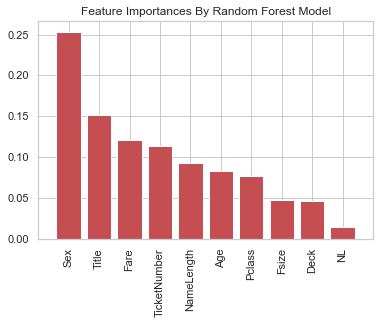

In [110]:
std = np.std([rf.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
sorted_important_features=[]
for i in indices:
    sorted_important_features.append(predictors[i])
#predictors=titanic.columns
plt.figure()
plt.title("Feature Importances By Random Forest Model")
plt.bar(range(np.size(predictors)), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(np.size(predictors)), sorted_important_features, rotation='vertical')

plt.xlim([-1, np.size(predictors)])

### Gradient Boosting

In [111]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest,f_classif

In [112]:
predictors = ["Pclass", "Sex", "Age",
              "Fare","NL", "Fsize","NameLength","Deck","Embarked"]

In [113]:
selector = SelectKBest(f_classif, k=5)
selector.fit(titanic_train[predictors],titanic_train['Survived'])

SelectKBest(k=5)

In [114]:
scores = -np.log(selector.pvalues_)

In [115]:
indices = np.argsort(scores)[::-1]

In [116]:
sorted_important_features = []

In [117]:
for i in indices:
    sorted_important_features.append(predictors[i])

(-1.0, 9.0)

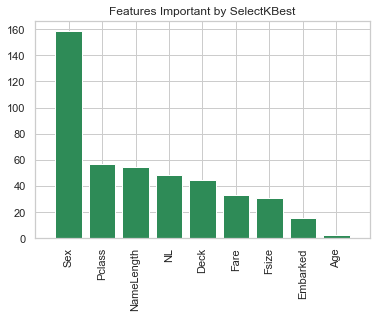

In [118]:
plt.figure()
plt.title('Features Important by SelectKBest')
plt.bar(range(np.size(predictors)),scores[indices],
        color='seagreen',align='center')
plt.xticks(range(np.size(predictors)),sorted_important_features, rotation='vertical')
plt.xlim([-1,np.size(predictors)])

In [119]:
from sklearn.linear_model import LogisticRegression
predictors = ["Pclass", "Sex", "Age", "Fare", "Embarked","NL",
              "Fsize", "Title","Deck"]

# Initialize our algorithm
lr = LogisticRegression(random_state=1)
# Compute the accuracy score for all the cross validation folds.  
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=50)
scores = cross_val_score(lr, titanic_train[predictors], titanic_train["Survived"],cv=cv)
print(scores.mean())

0.8026119402985075


In [123]:
from sklearn.ensemble import AdaBoostClassifier
predictors = ["Pclass", "Sex", "Age", "Fare", "Embarked","NL",
              "Fsize", "Title","Deck","TicketNumber"]
adb=AdaBoostClassifier()
adb.fit(titanic_train[predictors],titanic_train["Survived"])
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=50)
scores = cross_val_score(adb, titanic_train[predictors], titanic_train["Survived"],cv=cv)
print(scores.mean())

0.8257462686567164
